### Obesity Level Estimation

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

In [2]:
# Read file
df = pd.read_csv("ObesityDataSet - Org.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   int32   
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   int32   
 7   NCP                             2111 non-null   int32   
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   int32   
 11  SCC                             2111 non-null   category
 12  FAF                 

In [20]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [21]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Convert Ordinal to Category
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

# convert float to int
cols = ["Age","FCVC", "NCP", "CH2O", "TUE", "FAF"]

for col in cols:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int') 

In [4]:
data = df.copy()

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.NObeyesdad=le.fit_transform(data.NObeyesdad)
data.Gender=le.fit_transform(data.Gender)
data.family_history_with_overweight=le.fit_transform(data.family_history_with_overweight)
data.FAVC=le.fit_transform(data.FAVC)
data.CAEC=le.fit_transform(data.CAEC)
data.SMOKE=le.fit_transform(data.SMOKE)
data.SCC=le.fit_transform(data.SCC)
data.CALC=le.fit_transform(data.CALC)
data.MTRANS=le.fit_transform(data.MTRANS)

In [5]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1.80,77.0,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1.80,87.0,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,3,6


In [6]:
# Height and weight are highly correlated and they directly correlate to the BMI calc used for the target
# Remove Height and Weight
data = data.drop(columns=['Height', 'Weight'])

In [26]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#print highly correlated variables
print("Number of variables with > 0.95 correlation: ", len(to_drop))

Number of variables with > 0.95 correlation:  0


<AxesSubplot:title={'center':'Coorelation Heatmap: Predictor Variables'}>

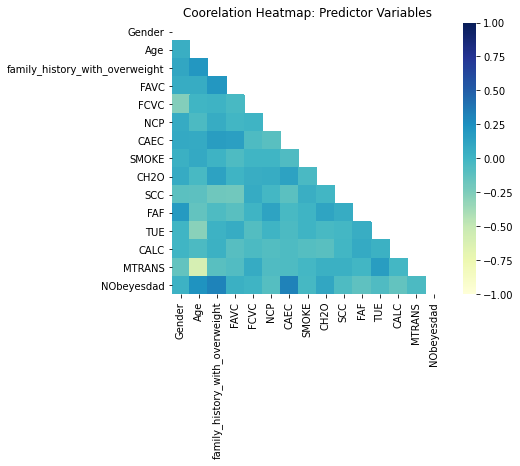

In [28]:
# create figure
fig = plt.figure(figsize=(15, 5))

# add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)

# correlation data matrix
matrix = np.triu(data.corr())

# set title 
ax1.title.set_text("Coorelation Heatmap: Predictor Variables")

#define plot
sns.heatmap(data.corr(), 
                 mask=matrix,
                 annot = False,                 
                 fmt='.1g', 
                 cmap="YlGnBu", 
                 vmin=-1, vmax=1, center= 0,                 
                 square="True",
                 ax=ax1)


In [7]:
# split dataset in features and target variable
# Features
X = data.drop(columns=["NObeyesdad"])
# Target variable
y = data['NObeyesdad'] 

In [8]:
# import sklearn packages for data treatments
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


#### Feature Importance

Feature: 0, Score: 0.04452
Feature: 1, Score: 0.23264
Feature: 2, Score: 0.05966
Feature: 3, Score: 0.03912
Feature: 4, Score: 0.04658
Feature: 5, Score: 0.06337
Feature: 6, Score: 0.15085
Feature: 7, Score: 0.00937
Feature: 8, Score: 0.05445
Feature: 9, Score: 0.02680
Feature: 10, Score: 0.06522
Feature: 11, Score: 0.05997
Feature: 12, Score: 0.07152
Feature: 13, Score: 0.07594


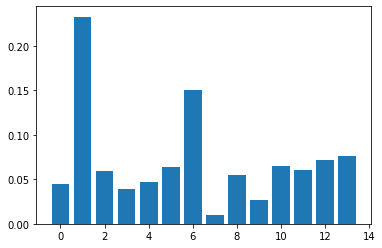

In [33]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [50]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

In [ ]:
#### ML Models

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    models = [('naive_bayes', GaussianNB()),
        ('Logistic Regression', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ('Random Forest', RandomForestClassifier(random_state=2020)),
        ('SVM', SVC(C=1000, gamma=1, kernel='linear')),
        ('Decision Tree', DecisionTreeClassifier())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        #New prediction
        new_data=[[1,45,0,0,1,2,0,3,3,2,1,0,3,2]]
        y_new=model.predict(new_data)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")
        print("Predicted Y:", y_new[0])
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("Accuracy:", accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("--------------------------------------------------------------- \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("---------------------------------------------------------------\n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("--------------------------------------------------------------- \n")
        

In [55]:
run_models(X_train, y_train, X_test, y_test)


naive_bayes:
---------------------------------------------------------------
Predicted Y: Obesity_Type_I
Accuracy: 0.53943
Accuracy w/Scaled Data (ss): 0.53943
Accuracy w/Scaled Data (mm): 0.53943

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.54      0.67      0.60        92
      Normal_Weight       0.36      0.18      0.24        77
     Obesity_Type_I       0.46      0.49      0.47       114
    Obesity_Type_II       0.42      0.98      0.59        85
   Obesity_Type_III       0.98      0.98      0.98        92
 Overweight_Level_I       0.58      0.25      0.35        89
Overweight_Level_II       0.50      0.18      0.26        85

           accuracy                           0.54       634
          macro avg       0.55      0.53      0.50       634
       weighted avg       0.55      0.54      0.51       634

--------------------------------------------------------------- 



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression:
---------------------------------------------------------------
Predicted Y: Obesity_Type_II
Accuracy: 0.55678
Accuracy w/Scaled Data (ss): 0.55836
Accuracy w/Scaled Data (mm): 0.55836

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.56      0.54      0.55        92
      Normal_Weight       0.33      0.34      0.33        77
     Obesity_Type_I       0.47      0.61      0.53       114
    Obesity_Type_II       0.57      0.84      0.68        85
   Obesity_Type_III       0.90      0.99      0.94        92
 Overweight_Level_I       0.58      0.35      0.44        89
Overweight_Level_II       0.40      0.19      0.26        85

           accuracy                           0.56       634
          macro avg       0.54      0.55      0.53       634
       weighted avg       0.55      0.56      0.54       634

--------------------------------------------------------------- 

KNN:
-------------------

#### Grid Search-Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [54]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.2min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

#### Grid Search-Decision Tree

In [55]:
def Snippet_146_Ex_2():
    print('**Optimizing hyper-parameters of a Decision Tree model using Grid Search in Python**\n')


    # importing libraries
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler

    # Loading wine dataset
    dataset = datasets.load_wine()
    

    # Creating an standardscaler object
    std_slc = StandardScaler()

    # Creating a pca object
    pca = decomposition.PCA()

    # Creating a DecisionTreeClassifier
    dec_tree = tree.DecisionTreeClassifier()

    # Creating a pipeline of three steps. First, standardizing the data.
    # Second, tranforming the data with PCA.
    # Third, training a Decision Tree Classifier on the data.
    pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

    # Creating Parameter Space
    # Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
    n_components = list(range(1,X.shape[1]+1,1))

    # Creating lists of parameter for Decision Tree Classifier
    criterion = ['gini', 'entropy']
    max_depth = [2,4,6,8,10,12]

    # Creating a dictionary of all the parameter options 
    # Note that we can access the parameters of steps of a pipeline by using '__’
    parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

    # Conducting Parameter Optmization With Pipeline
    # Creating a grid search object
    clf_GS = GridSearchCV(pipe, parameters)

    # Fitting the grid search
    clf_GS.fit(X, y)

    # Viewing The Best Parameters
    print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
    print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

   
Snippet_146_Ex_2()

**Optimizing hyper-parameters of a Decision Tree model using Grid Search in Python**

Best Criterion: entropy
Best max_depth: 12
Best Number Of Components: 14

DecisionTreeClassifier(criterion='entropy', max_depth=12)


### Ensemble Models

#### Gradient Boosting

In [79]:
# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset

# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=14, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X, y)
# make a single prediction
row = [[1, 45, 0, 0, 1, 2, 0, 3, 3, 2, 1, 0, 3, 2]]
yhat = model.predict(row)
print('Predicted NObeyesdad: %d' % yhat[0])

Accuracy: 0.775 (0.026)
Predicted NObeyesdad: 5


#### Histogram-Based Gradient Boosting

In [25]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# evaluate the model
model = HistGradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=14, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(X, y)
# make a single prediction
row = [[1, 45, 0, 0, 1, 2, 0, 3, 3, 2, 1, 0, 3, 2]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.814 (0.027)
Prediction: 1


#### Catboost

In [83]:
# catboost for classification
from catboost import CatBoostClassifier

# evaluate the model
model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X, y)
# make a single prediction
row = [[1, 45, 0, 0, 1, 2, 0, 3, 3, 2, 1, 0, 3, 2]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.806 (0.026)
Prediction: 5


In [34]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

[10:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.749211356466877

#### Averaging

In [56]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

new_data=[[1,45,0,0,1,2,0,3,3,2,1,0,3,2]]

pred1=model1.predict(new_data)
pred2=model2.predict(new_data)
pred3=model3.predict(new_data)

finalpred=(pred1+pred2+pred3)/3
finalpred

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([4.33333333])

#### Max Voting

In [57]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6435331230283912

#### Bagging Classifier

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
score1=model.score(X_test,y_test)
new_data=[[1,45,0,0,1,2,0,3,3,2,1,0,3,2]]
pred1=model.predict(new_data)
print(pred1)
print(score1)

[6]
0.8028391167192429


#### Model Comparison

In [38]:
models = pd.DataFrame({ 
    'Model': [ 'Logistic Regression', 'Support Vector Machines', 'KNN', 
               'Naive Bayes','Decision tree','Random forest','Gradient Boosting','Histogram-Based GB','Catboost','Bagging Classifier'], 
    'Score': [0.55,0.62,0.72,0.53,0.76,0.81,0.77,0.81,0.80,0.80], 
     'Predicted Y': ['Obesity_Type_II', 'Obesity_Type_II', 'Overweight_Level_II',  
              'Obesity_Type_I','Obesity_Type_I','Obesity_Type_II','Overweight_Level_I','Normal','Overweight_Level_I','Overweight_Level_II']}) 
models.sort_values(by='Score', ascending=False)

,Model,Score,Predicted Y
5,Random forest,0.81,Obesity_Type_II
7,Histogram-Based GB,0.81,Normal
8,Catboost,0.80,Overweight_Level_I
9,Bagging Classifier,0.80,Overweight_Level_II
6,Gradient Boosting,0.77,Overweight_Level_I
4,Decision tree,0.76,Obesity_Type_I
2,KNN,0.72,Overweight_Level_II
1,Support Vector Machines,0.62,Obesity_Type_II
0,Logistic Regression,0.55,Obesity_Type_II
3,Naive Bayes,0.53,Obesity_Type_I


#### Visualization  

Text(0, 0.5, 'Scores')

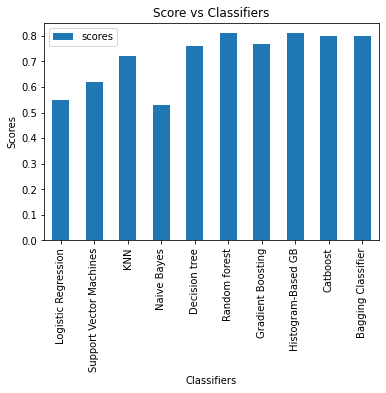

In [39]:
# Create a sample dataframe with an text index 
plotdata = pd.DataFrame( 
    {"scores": [0.55,0.62,0.72,0.53,0.76,0.81,0.77,0.81,0.80,0.80]},  
    index=[ 'Logistic Regression', 'Support Vector Machines', 'KNN', 
               'Naive Bayes','Decision tree','Random forest','Gradient Boosting','Histogram-Based GB','Catboost','Bagging Classifier']) 
# Plot a bar chart 
plotdata.plot(kind="bar" ,title="Score vs Classifiers") 
plt.xlabel("Classifiers") 
plt.ylabel("Scores")

Text(0, 0.5, 'Precision')

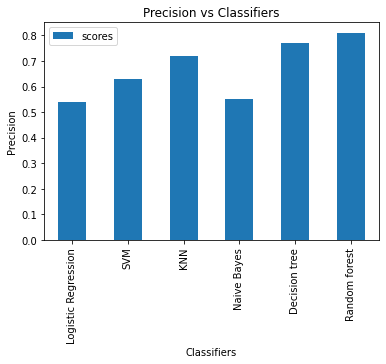

In [62]:
# Create a sample dataframe with an text index 
plotdata = pd.DataFrame( 
    {"scores": [0.54,0.63,0.72,0.55,0.77,0.81]},  
    index=["Logistic Regression", "SVM", "KNN", 
               "Naive Bayes","Decision tree","Random forest"]) 
# Plot a bar chart 
plotdata.plot(kind="bar" ,title="Precision vs Classifiers") 
plt.xlabel("Classifiers") 
plt.ylabel("Precision")

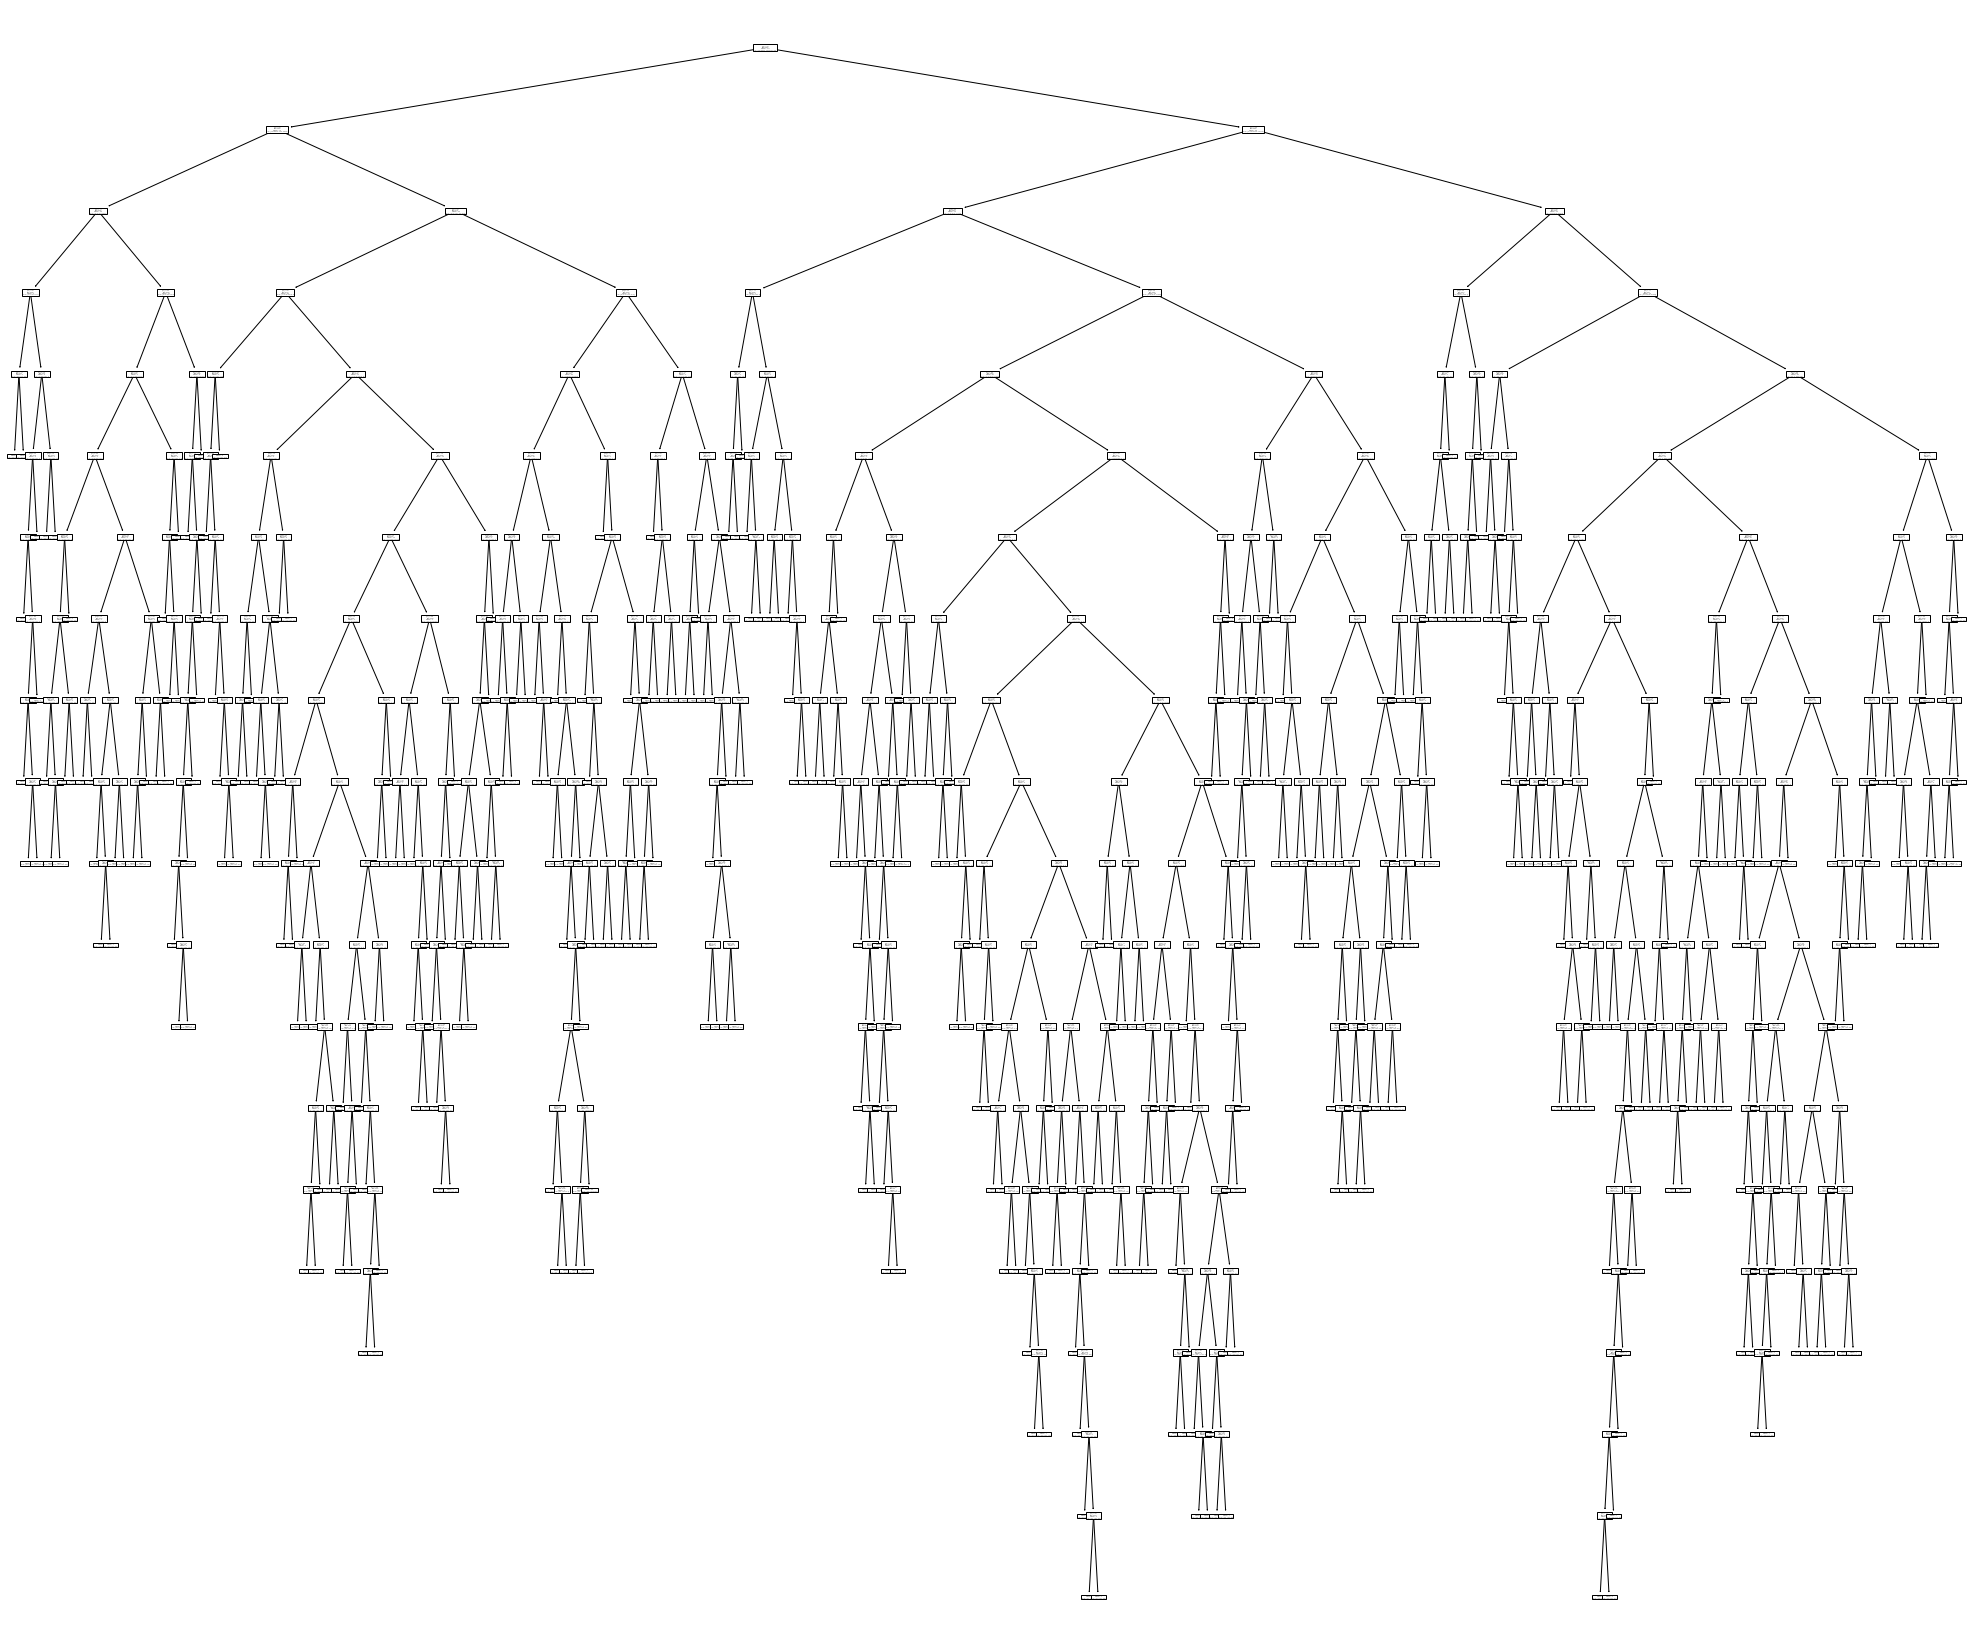

In [66]:
from sklearn import tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
text_representation = tree.export_text(decision_tree)
fig = plt.figure(figsize=(35,30)) 
_ = tree.plot_tree(decision_tree) 

Text(69.0, 0.5, 'Truth')

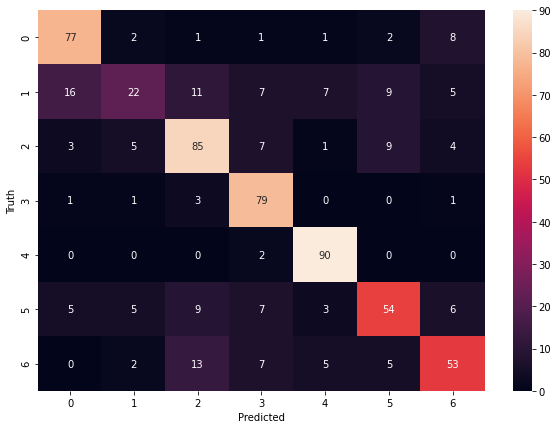

In [69]:
from sklearn.metrics import confusion_matrix
KNN_CLs = KNeighborsClassifier()
KNN_CLs.fit(X_train, y_train)
y_pred = KNN_CLs.predict(X_test)
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

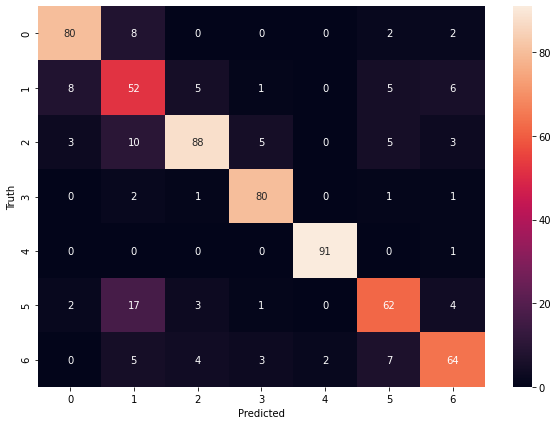

In [90]:
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier(random_state=2020)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

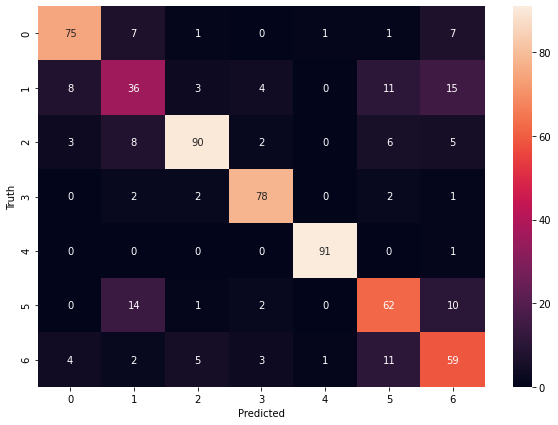

In [70]:
from sklearn.metrics import confusion_matrix
DS = DecisionTreeClassifier()
DS.fit(X_train, y_train)
y_pred = DS.predict(X_test)

confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

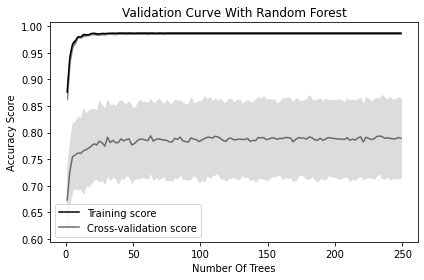

In [88]:
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()